In [155]:
import pandas as pd

import numpy as np
from scipy.stats import norm
import queue
from ctypes import string_at
from sys import getsizeof
import ctypes
from binascii import hexlify
import math
from collections import defaultdict
import random
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib
%matplotlib inline
#以上操作导入包

In [156]:
df_train = pd.read_csv(r"C:\Users\fulian\Desktop\trainada.csv")
df_train["weight"] = 1/df_train.shape[0]
df_train["bucket"] = ""
print(df_train)
print(df_train.shape[0] - 1)

       密度    含糖率  好瓜    weight bucket
0   0.697  0.460   1  0.058824       
1   0.774  0.376   1  0.058824       
2   0.634  0.264   1  0.058824       
3   0.608  0.318   1  0.058824       
4   0.556  0.215   1  0.058824       
5   0.403  0.237   1  0.058824       
6   0.481  0.149   1  0.058824       
7   0.437  0.211   1  0.058824       
8   0.666  0.091   0  0.058824       
9   0.243  0.267   0  0.058824       
10  0.245  0.057   0  0.058824       
11  0.343  0.099   0  0.058824       
12  0.639  0.161   0  0.058824       
13  0.657  0.198   0  0.058824       
14  0.360  0.370   0  0.058824       
15  0.593  0.042   0  0.058824       
16  0.719  0.103   0  0.058824       
16


c:\Users\fulian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


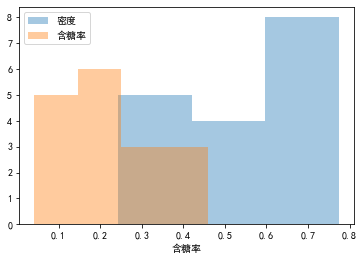

In [157]:
sns.distplot(a=df_train['密度'], label="密度", kde=False)
sns.distplot(a=df_train['含糖率'], label="含糖率", kde=False)
plt.legend()

In [158]:
p = {}
sugar = {}
set1 = {0.40,0.57}
set2 = {0.14,0.25}

In [159]:
def bining(df):
    p = {}
    sugar = {}
    s1 = 0
    sy1 = 0
    s2 = 0
    sy2 = 0
    s3 = 0
    sy3 = 0
    n1 = 0
    ny1 = 0
    n2 = 0
    ny2 = 0
    n3 = 0
    ny3 = 0
    for i in range(df.shape[0]):
        if df.iat[i,0] <= 0.4:
            s1 += 1
            if df.iat[i,2] == 1:
                sy1 += 1
        if df.iat[i,0] > 0.4 and df.iat[i,0] <= 0.57:
            s2 += 1
            if df.iat[i,2] == 1:
                sy2 += 1
        if df.iat[i,0] > 0.57 :
            s3 += 1
            if df.iat[i,2] == 1:
                sy3 += 1
        if df.iat[i,1] <= 0.14:
            n1 += 1
            if df.iat[i,2] == 1:
                ny1 += 1
        if df.iat[i,1] > 0.14 and df.iat[i,1] <= 0.25:
            n2 += 1
            if df.iat[i,2] == 1:
                ny2 += 1
        if df.iat[i,1] > 0.25 :
            n3 += 1
            if df.iat[i,2] == 1:
                ny3 += 1
    p['低密度'] = sy1/s1
    p['中密度'] = sy2/s2
    p['高密度'] = sy3/s3
    sugar['低含糖'] = ny1/n1
    sugar['中含糖'] = ny2/n2
    sugar['高含糖'] = ny3/n3
    return p,sugar

In [160]:
def random_dataset(df):
    cols = df.columns.values
    new_set = pd.DataFrame(columns=cols)
    result = []
    for i in range(df.shape[0]):
        random.randint(0,df.shape[0] - 1)
        result.append(i)
    for i in range(len(result)):
        insertRow = df.iloc[result[i], :]
        new_set = new_set.append(insertRow)
    return new_set


In [161]:
def train(df,times):
    sp1 = 0
    sp2 = 0
    sp3 = 0
    ss1 = 0
    ss2 = 0
    ss3 = 0
    t = times
    while(t > 0):

        p,sugar = bining(random_dataset(df_train))
        sp1 = sp1 + p['低密度']
        sp2 = sp2 + p['中密度']
        sp3 = sp3 + p['高密度']
        ss1 = ss1 + sugar['低含糖']
        ss2 = ss2 + sugar['中含糖']
        ss3 = ss3 + sugar['高含糖']
        t -= 1
    p['低密度'] = sp1/times
    p['中密度'] = sp2/times
    p['高密度'] =sp3/times
    sugar['低含糖'] = ss1/times
    sugar['中含糖'] = ss2/times
    sugar['高含糖'] = ss3/times
    return p,sugar
train(df_train,50)


({'低密度': 0.0, '中密度': 1.0, '高密度': 0.4444444444444441},
 {'低含糖': 0.0, '中含糖': 0.666666666666667, '高含糖': 0.666666666666667})

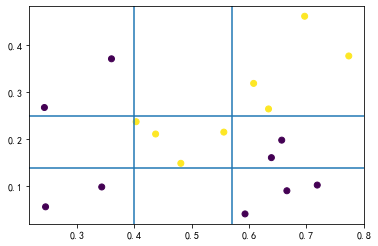

In [162]:
fig, ax = plt.subplots()
ax.scatter(df_train["密度"],df_train["含糖率"],c=df_train["好瓜"])
for u in set1:
  plt.axvline(u)
for v in set2:
    plt.axhline(v)